In [1]:
import pandas as pd

In [2]:
account = pd.read_csv('users.csv',  sep=":")


In [3]:
account

,sex,age,job
0,M,56,16
1,M,56,7
2,M,56,1
3,F,56,9
4,M,56,13
...,...,...,...
146,F,1,10
147,F,1,10
148,F,1,10
149,F,1,10


In [4]:
account['sex'] = account['sex'].map({'M':0,'F':1})

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kmodes import KModes

In [6]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(account)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 280.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 217.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 174.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves:

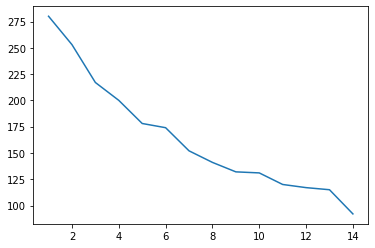

In [7]:
y = np.array([i for i in range(1,15,1)])
plt.plot(y,cost)

In [8]:
test_df1 = account.copy()
test_df2 = account.copy()

In [9]:
kmode = KModes(n_clusters=12, init = "Cao", n_init = 1, verbose=1)
cluster_label = kmode.fit_predict(test_df1)
test_df1['Cluster'] = cluster_label

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 117.0
Run 1, iteration: 2/100, moves: 0, cost: 117.0


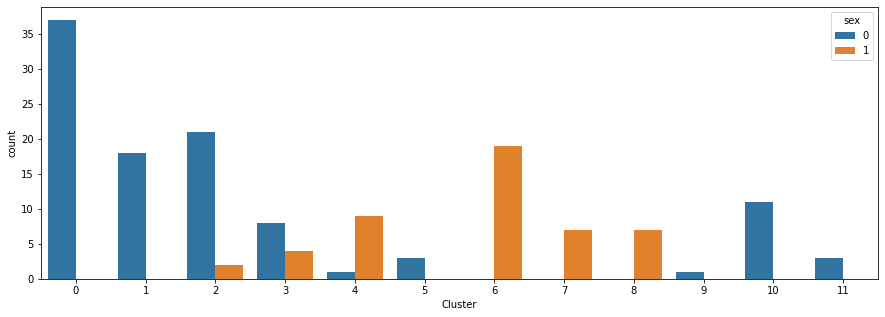

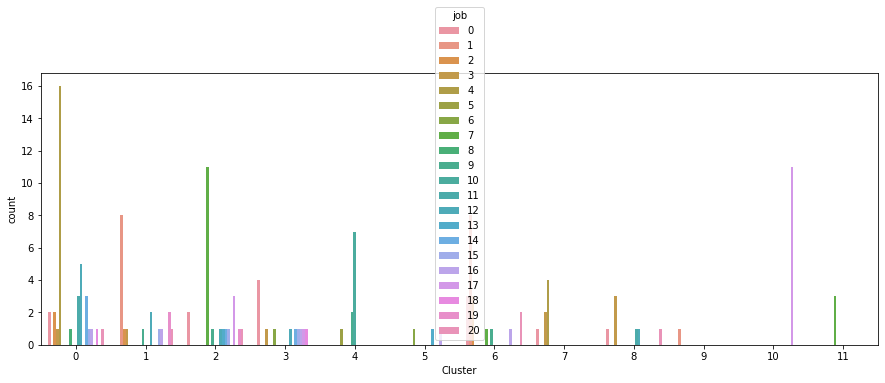

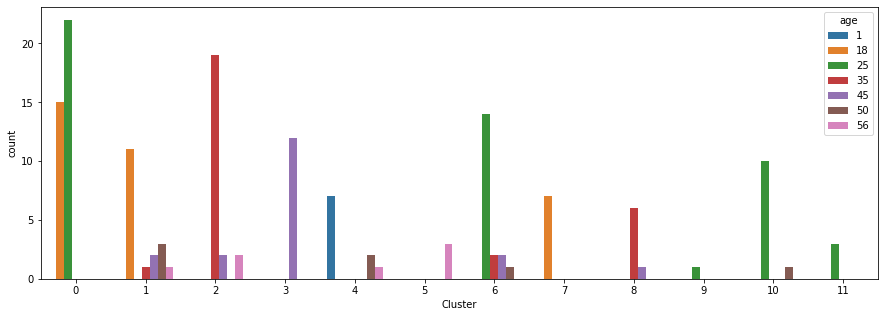

In [10]:
for col in ['sex','job','age']:
    plt.subplots(figsize=(15,5))
    sns.countplot(x='Cluster', hue=col, data=test_df1)
    plt.show()

In [11]:
test_df1 = test_df1.drop(['sex','age','job'],axis=1)
test_df1['account_id'] = range(0,len(test_df1))
g = test_df1.groupby(test_df1['Cluster']).count()

In [12]:
g

## 데이터 개수가 5개보다 적은 class가 보인다. class개수를 8개로 줄여서 다시 실험.

,account_id
Cluster,
0,37
1,18
2,23
3,12
4,10
5,3
6,19
7,7
8,7


In [13]:
kmode = KModes(n_clusters=8, init = "Cao", n_init = 5, verbose=2)
cluster_label = kmode.fit_predict(test_df2)
test_df2['Cluster'] = cluster_label

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 141.0


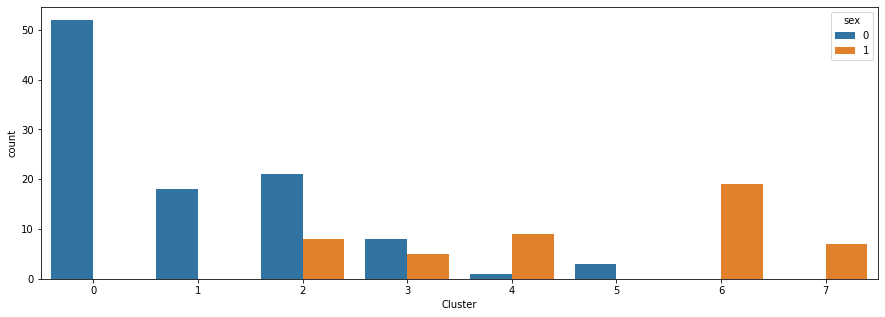

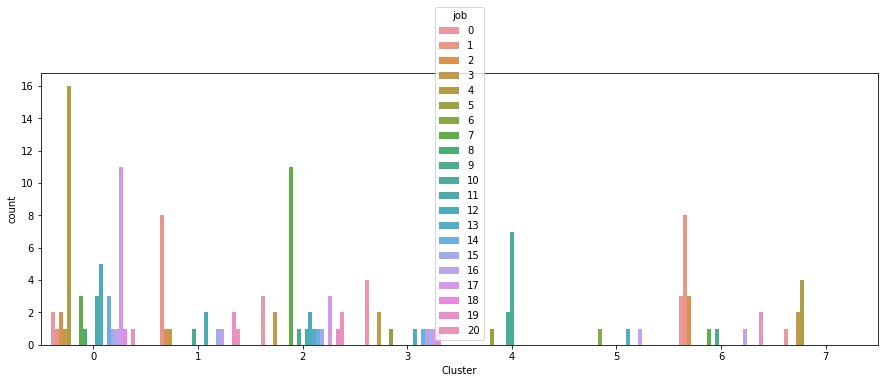

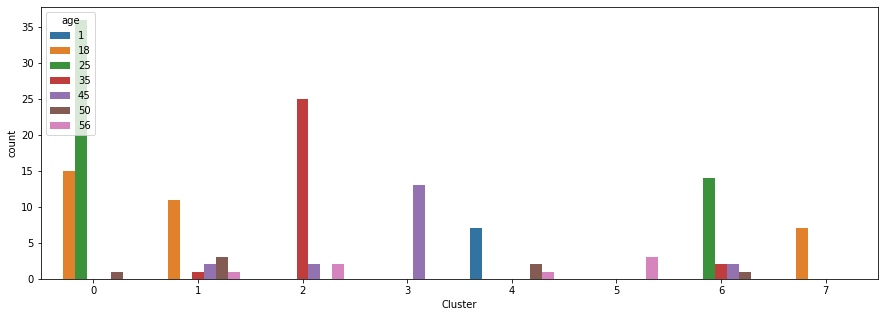

In [14]:
for col in ['sex','job','age']:
    plt.subplots(figsize=(15,5))
    sns.countplot(x='Cluster', hue=col, data=test_df2)
    plt.show()

In [15]:
test_df2 = test_df2.drop(['sex','age','job'],axis=1)
test_df2['account_id'] = range(0,len(test_df2))
g = test_df2.groupby(test_df2['Cluster']).count()
g

,account_id
Cluster,
0,52
1,18
2,29
3,13
4,10
5,3
6,19
7,7


In [16]:
test_df2.to_csv('account_cluster.csv', sep=',', index=False)

In [17]:
test_df2

,Cluster,account_id
0,5,0
1,2,1
2,1,2
3,4,3
4,5,4
...,...,...
146,4,146
147,4,147
148,4,148
149,4,149


In [23]:
from joblib import dump
dump(kmode, 'kmode.joblib') 

IsADirectoryError: [Errno 21] Is a directory: '/home/woo'